In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
file_dataset = 'dataset_tweet_sentiment_pilkada_DKI_2017.csv'

data = pd.read_csv(file_dataset)

data.head()

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              900 non-null    int64 
 1   Sentiment       900 non-null    object
 2   Pasangan Calon  900 non-null    object
 3   Text Tweet      900 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.2+ KB


In [4]:
print("Jumlah Data Berdasarkan Pasangan Calon: ", data.groupby("Pasangan Calon").size())

dp = data.query("Sentiment == 'positive'")
dn = data.query("Sentiment == 'negative'")
print("\n Jumlah Data Sentiment Positive", dp.groupby("Pasangan Calon").size())
print("\n Jumlah Data Sentiment Negative", dn.groupby("Pasangan Calon").size())

Jumlah Data Berdasarkan Pasangan Calon:  Pasangan Calon
Agus-Sylvi     300
Ahok-Djarot    300
Anies-Sandi    300
dtype: int64

 Jumlah Data Sentiment Positive Pasangan Calon
Agus-Sylvi     150
Ahok-Djarot    150
Anies-Sandi    150
dtype: int64

 Jumlah Data Sentiment Negative Pasangan Calon
Agus-Sylvi     150
Ahok-Djarot    150
Anies-Sandi    150
dtype: int64


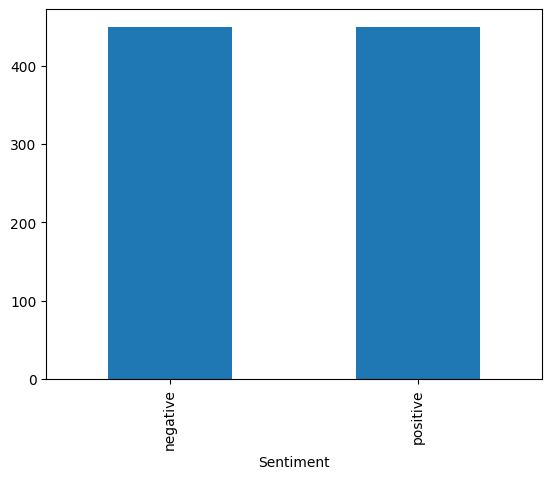

In [5]:
data['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [6]:
def remove_at_hash(sent):
    return re.sub(r'@|#', r'', sent.lower())

def remove_sites(sent):
    return re.sub(r'http.*', r'', sent.lower())

def remove_punct(sent):
    return ' '.join(re.findall(r'\w+', sent.lower()))

data['text_clean'] = data['Text Tweet'].apply(lambda x:remove_punct
                                              (remove_sites(remove_at_hash(x))))

data[['Text Tweet', 'text_clean']]

,Text Tweet,text_clean
0,Banyak akun kloning seolah2 pendukung #agussil...,banyak akun kloning seolah2 pendukung agussilv...
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,agussilvy bicara apa kasihan yaa lap itu air m...
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,Kasian oh kasian dengan peluru 1milyar untuk t...,kasian oh kasian dengan peluru 1milyar untuk t...
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,maaf ya pendukung agussilvy hayo dukung aniess...
...,...,...
895,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",kali saja bpk aniesbaswedan sandiuno lihat lag...
896,Kita harus dapat merangkul semua orang tanpa b...,kita harus dapat merangkul semua orang tanpa b...
897,Ini jagoanku dibidang digital <Smiling Face Wi...,ini jagoanku dibidang digital smiling face wit...
898,#PesanBijak #OkeOce #GubernurGu3 ...,pesanbijak okeoce gubernurgu3


In [7]:
le = preprocessing.LabelEncoder()
le.fit(data['Sentiment'])
data['label'] = le.transform(data['Sentiment'])
data

,Id,Sentiment,Pasangan Calon,Text Tweet,text_clean,label
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...,banyak akun kloning seolah2 pendukung agussilv...,0
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...,agussilvy bicara apa kasihan yaa lap itu air m...,0
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...,kalau aku sih gak nunggu hasil akhir qc tp lag...,0
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...,kasian oh kasian dengan peluru 1milyar untuk t...,0
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,maaf ya pendukung agussilvy hayo dukung aniess...,0
...,...,...,...,...,...,...
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",kali saja bpk aniesbaswedan sandiuno lihat lag...,1
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...,kita harus dapat merangkul semua orang tanpa b...,1
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...,ini jagoanku dibidang digital smiling face wit...,1
898,899,positive,Anies-Sandi,#PesanBijak #OkeOce #GubernurGu3 ...,pesanbijak okeoce gubernurgu3,1


In [8]:
data.label.value_counts()

label
0    450
1    450
Name: count, dtype: int64

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

stopword_factory = StopWordRemoverFactory()
stop_words = stopword_factory.get_stop_words()
cv = CountVectorizer(stop_words=stop_words,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['text_clean'])

d:\Aplikasi\Program\Python\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
X = data['text_clean']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(text_counts, y, test_size=0.2, random_state=25)

In [15]:
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

y_pred = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(y_pred, y_test)

print(str('{:04.2f}'.format(accuracy_score*100))+'%')

67.22%
